In [10]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("../data/processed_data/train.csv")

test_df = pd.read_csv("../data/processed_data/test.csv")

In [11]:
train_df.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,...,vesselType_14.0,vesselType_21.0,vesselType_83.0,enginePower,CEU,GT,breadth,length,DWT,maxSpeed
0,0.031663,0.858217,17.1,-6,316,0,01-08 06:00,7.50361,77.58340,61e9f38eb937134a3c4bfd8b,...,False,False,True,0.365826,0.764706,0.545107,0.583333,0.505354,0.170524,0.287879
1,0.031707,0.856825,17.3,5,313,0,01-14 23:30,7.57302,77.49505,61e9f38eb937134a3c4bfd8b,...,False,False,True,0.365826,0.764706,0.545107,0.583333,0.505354,0.170524,0.287879
2,0.031757,0.854596,16.9,5,312,0,01-14 23:30,7.65043,77.39404,61e9f38eb937134a3c4bfd8b,...,False,False,True,0.365826,0.764706,0.545107,0.583333,0.505354,0.170524,0.287879
3,0.031798,0.857660,16.9,6,313,0,01-14 23:30,7.71275,77.31394,61e9f38eb937134a3c4bfd8b,...,False,False,True,0.365826,0.764706,0.545107,0.583333,0.505354,0.170524,0.287879
4,0.031838,0.855153,16.3,7,313,0,01-14 23:30,7.77191,77.23585,61e9f38eb937134a3c4bfd8b,...,False,False,True,0.365826,0.764706,0.545107,0.583333,0.505354,0.170524,0.287879


In [12]:
test_df.columns

Index(['ID', 'vesselId', 'time', 'scaling_factor', 'week_of_the_year',
       'day_of_the_year', 'avg_lat_change_1_step', 'avg_lat_change_2_steps',
       'avg_lon_change_1_step', 'avg_lon_change_2_steps', 'vesselType_14.0',
       'vesselType_21.0', 'vesselType_83.0', 'enginePower', 'CEU', 'GT',
       'breadth', 'length', 'DWT', 'maxSpeed'],
      dtype='object')

In [13]:
train_df.columns

Index(['time', 'cog', 'sog', 'rot', 'heading', 'navstat', 'etaRaw', 'latitude',
       'longitude', 'vesselId', 'portId', 'latitude_1_step_ago',
       'longitude_1_step_ago', 'time_position_1_step_ago',
       'latitude_2_steps_ago', 'longitude_2_steps_ago',
       'time_position_2_steps_ago', 'cog_1_step_ago', 'time_cog_1_step_ago',
       'cog_2_steps_ago', 'time_cog_2_steps_ago', 'week_of_the_year',
       'day_of_the_year', 'lat_change_2_to_1_steps', 'lon_change_2_to_1_steps',
       'avg_lat_change_1_step', 'avg_lat_change_2_steps',
       'avg_lon_change_1_step', 'avg_lon_change_2_steps', 'vesselType_14.0',
       'vesselType_21.0', 'vesselType_83.0', 'enginePower', 'CEU', 'GT',
       'breadth', 'length', 'DWT', 'maxSpeed'],
      dtype='object')

In [14]:
nan_counts = train_df.isna().sum()

print(nan_counts)

time                            0
cog                             0
sog                             0
rot                             0
heading                         0
navstat                         0
etaRaw                          0
latitude                        0
longitude                       0
vesselId                        0
portId                       1615
latitude_1_step_ago           688
longitude_1_step_ago          688
time_position_1_step_ago      688
latitude_2_steps_ago         1375
longitude_2_steps_ago        1375
time_position_2_steps_ago    1375
cog_1_step_ago                688
time_cog_1_step_ago           688
cog_2_steps_ago              1375
time_cog_2_steps_ago         1375
week_of_the_year                0
day_of_the_year                 0
lat_change_2_to_1_steps      1375
lon_change_2_to_1_steps      1375
avg_lat_change_1_step           1
avg_lat_change_2_steps          1
avg_lon_change_1_step           1
avg_lon_change_2_steps          1
vesselType_14.

In [15]:
from sklearn.model_selection import train_test_split


X = train_df[['time', 'latitude_1_step_ago',
       'longitude_1_step_ago', 'latitude_2_steps_ago', 'longitude_2_steps_ago',
       'cog_1_step_ago', 'cog_2_steps_ago', 'week_of_the_year',
       'day_of_the_year', 'lat_change_2_to_1_steps', 'lon_change_2_to_1_steps',
       'avg_lat_change_1_step', 'avg_lat_change_2_steps',
       'avg_lon_change_1_step', 'avg_lon_change_2_steps',]]  # Features
y = train_df["cog"]  # Label

# Split the data: 80% training, 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X.head()

X_train shape: (1217652, 15)
X_test shape: (304413, 15)
y_train shape: (1217652,)
y_test shape: (304413,)


,time,latitude_1_step_ago,longitude_1_step_ago,latitude_2_steps_ago,longitude_2_steps_ago,cog_1_step_ago,cog_2_steps_ago,week_of_the_year,day_of_the_year,lat_change_2_to_1_steps,lon_change_2_to_1_steps,avg_lat_change_1_step,avg_lat_change_2_steps,avg_lon_change_1_step,avg_lon_change_2_steps
0,0.031663,NaN,NaN,NaN,NaN,NaN,NaN,0.019231,0.030137,NaN,NaN,0.073175,0.146541,-0.178895,-0.358466
1,0.031707,7.50361,77.58340,NaN,NaN,0.858217,NaN,0.019231,0.030137,NaN,NaN,0.073175,0.146541,-0.178895,-0.358466
2,0.031757,7.57302,77.49505,7.50361,77.58340,0.856825,0.858217,0.019231,0.030137,0.06941,-0.08835,0.073175,0.146541,-0.178895,-0.358466
3,0.031798,7.65043,77.39404,7.57302,77.49505,0.854596,0.856825,0.019231,0.030137,0.07741,-0.10101,0.073175,0.146541,-0.178895,-0.358466
4,0.031838,7.71275,77.31394,7.65043,77.39404,0.857660,0.854596,0.019231,0.030137,0.06232,-0.08010,0.073175,0.146541,-0.178895,-0.358466


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

xgb_regressor = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=20, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")


RMSE: 0.19109628080175725


<Figure size 1000x600 with 0 Axes>

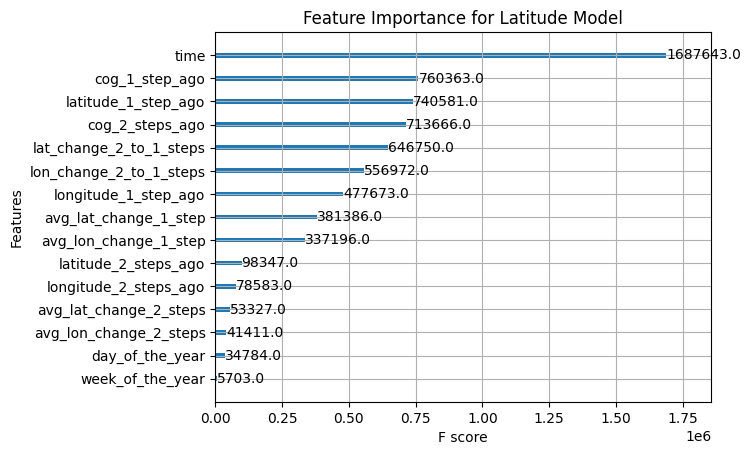

In [17]:
import matplotlib.pyplot as plt
import xgboost as xgb


# Plot feature importance for the Latitude model
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_regressor, importance_type='weight', title="Feature Importance for Latitude Model")
plt.show()

In [18]:
import joblib

joblib.dump(xgb_regressor, 'cog_model.pkl')



['cog_model.pkl']